In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Bike Sharing Train

In [2]:
bike_sharing_train = pd.read_csv('data/bike_sharing_train.csv', skipinitialspace=True)
bike_sharing_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike_sharing_train.shape

(10886, 12)

In [4]:
bike_sharing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
bike_sharing_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
bike_sharing_train.datetime = pd.to_datetime(bike_sharing_train.datetime)
bike_sharing_train.datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [7]:
bike_sharing_train['year'] = bike_sharing_train['datetime'].dt.year
bike_sharing_train['month'] = bike_sharing_train['datetime'].dt.month
bike_sharing_train['day'] = bike_sharing_train['datetime'].dt.day
bike_sharing_train['hour'] = bike_sharing_train['datetime'].dt.hour
bike_sharing_train['dayofweek'] = bike_sharing_train["datetime"].dt.dayofweek # Monday=0, Sunday=6.
bike_sharing_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [8]:
pd.pivot_table(bike_sharing_train, values='datetime', index=['holiday'], columns =['workingday'], aggfunc='count')

workingday,0,1
holiday,,
0,3163.0,7412.0
1,311.0,NaN


In [9]:
bike_sharing_train['season'] = bike_sharing_train['season'].map({1: 'spring', 2: 'summer', 3: 'autumn', 4: 'winter'})
bike_sharing_train['holiday'] = bike_sharing_train['holiday'].map({0: 'Not a holiday', 1: 'A holiday'})
bike_sharing_train['workingday'] = bike_sharing_train['workingday'].map({0: 'Not a working day', 1: 'A working day'})
bike_sharing_train['weather'] = bike_sharing_train['weather'].map({
    1: 'Good',
    2: 'Slightly cloudy',
    3: 'Cloudy',
    4: 'Very cloudy'
})
bike_sharing_train['dayofweek'] = bike_sharing_train['dayofweek'].map({
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Sat', 
    6: 'Sun'
})
bike_sharing_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,spring,Not a holiday,Not a working day,Good,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Sat
1,2011-01-01 01:00:00,spring,Not a holiday,Not a working day,Good,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Sat
2,2011-01-01 02:00:00,spring,Not a holiday,Not a working day,Good,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Sat
3,2011-01-01 03:00:00,spring,Not a holiday,Not a working day,Good,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Sat
4,2011-01-01 04:00:00,spring,Not a holiday,Not a working day,Good,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Sat


## EDA

<Axes: xlabel='count', ylabel='Density'>

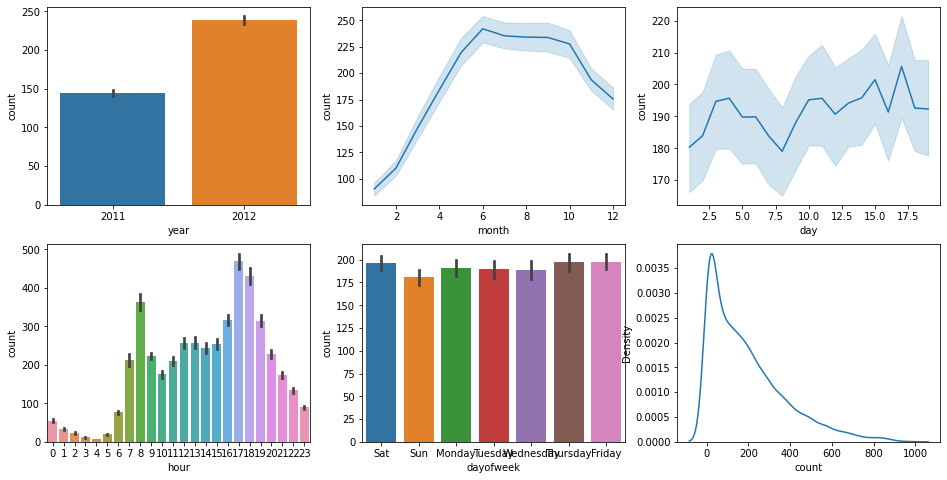

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
sns.barplot(data = bike_sharing_train, x = 'year', y = 'count', ax = axs[0, 0])
sns.lineplot(data = bike_sharing_train, x = 'month', y = 'count', ax = axs[0, 1])
sns.lineplot(data = bike_sharing_train, x = 'day', y = 'count', ax = axs[0, 2])
sns.barplot(data = bike_sharing_train, x = 'hour', y = 'count', ax = axs[1, 0])
sns.barplot(data = bike_sharing_train, x = 'dayofweek', y = 'count', ax = axs[1, 1])
sns.kdeplot(data = bike_sharing_train, x = 'count', ax = axs[1, 2])

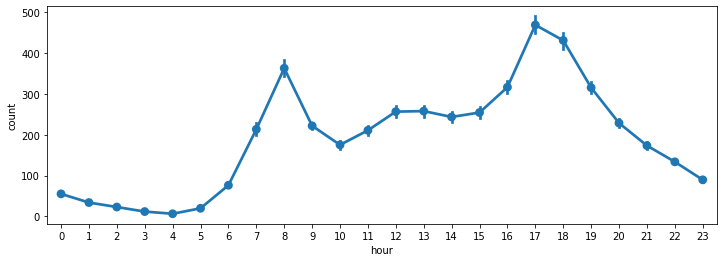

In [11]:
plt.figure(figsize = (12, 4))
sns.pointplot(x = 'hour', y = 'count', data = bike_sharing_train)
plt.show()

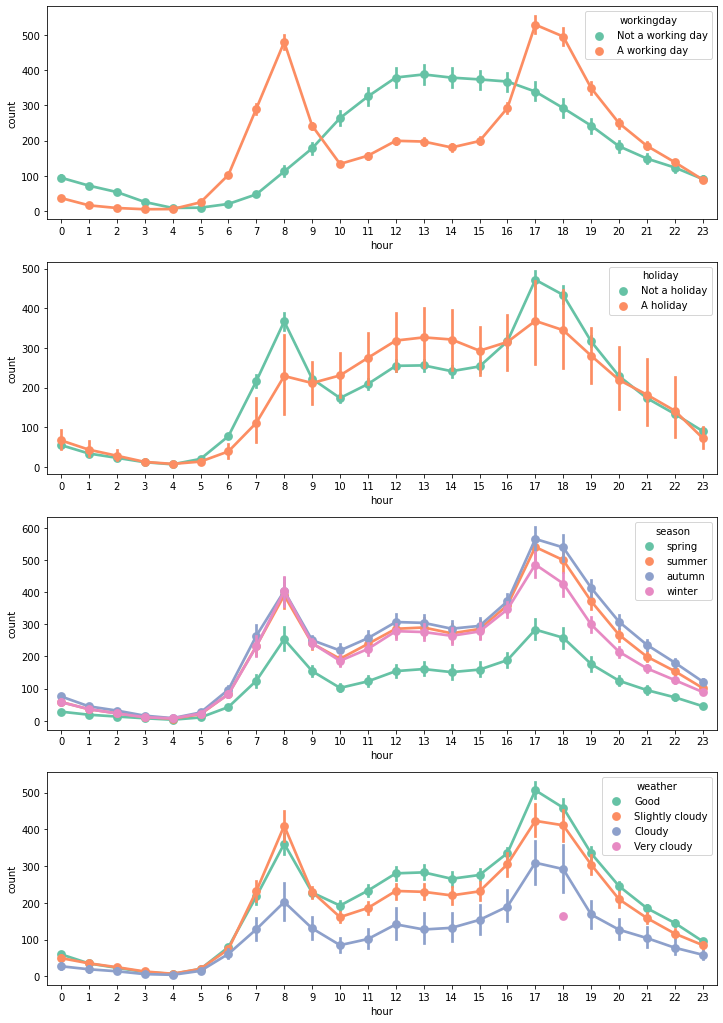

In [12]:
sns.set_palette("Set2")
fig, axs = plt.subplots(nrows = 4)
fig.set_size_inches(12, 18)

sns.pointplot(x = 'hour', y = 'count', data = bike_sharing_train, hue = 'workingday', ax = axs[0])
sns.pointplot(x = 'hour', y = 'count', data = bike_sharing_train, hue = 'holiday', ax = axs[1])
sns.pointplot(x = 'hour', y = 'count', data = bike_sharing_train, hue = 'season', ax = axs[2])
sns.pointplot(x = 'hour', y = 'count', data = bike_sharing_train, hue = 'weather', ax = axs[3])
plt.show()

In [13]:
bike_sharing_train[bike_sharing_train.weather=='Very cloudy']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
5631,2012-01-09 18:00:00,spring,Not a holiday,A working day,Very cloudy,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,Monday


<Axes: xlabel='hour', ylabel='count'>

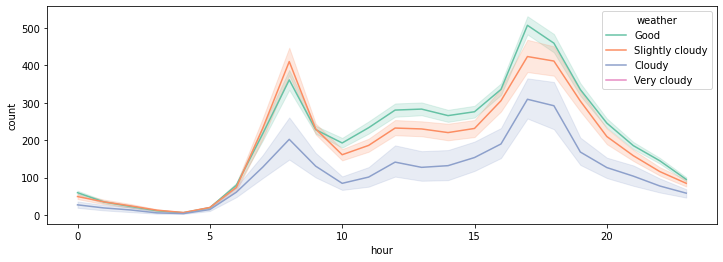

In [14]:
plt.figure(figsize = (12, 4))
sns.lineplot(x = 'hour', y = 'count', data = bike_sharing_train, hue = 'weather')

### Correlation

In [15]:
bike_sharing_train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


<Axes: >

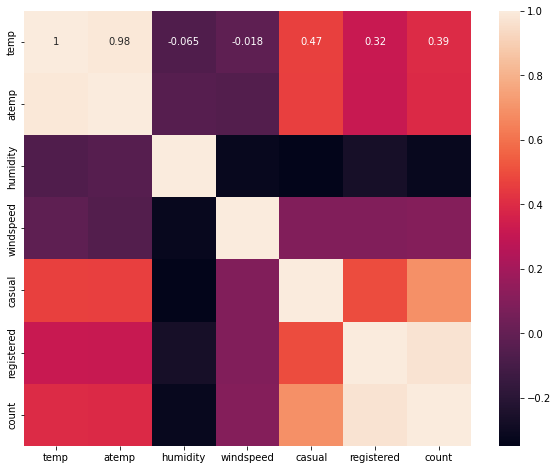

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(bike_sharing_train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr(), annot = True)

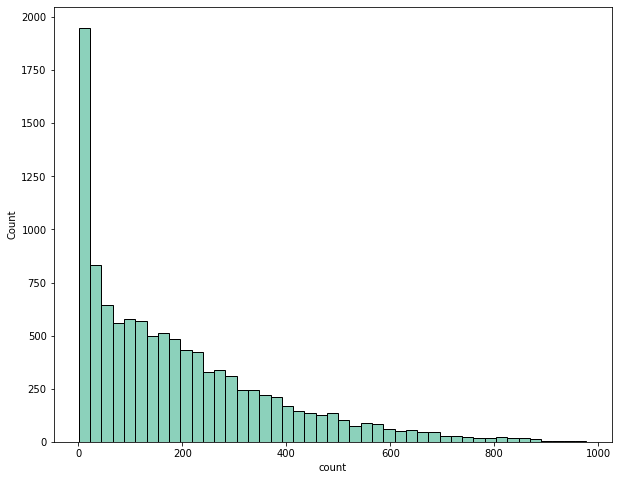

In [17]:
plt.figure(figsize=(10, 8))
sns.histplot(bike_sharing_train['count'])
plt.show()

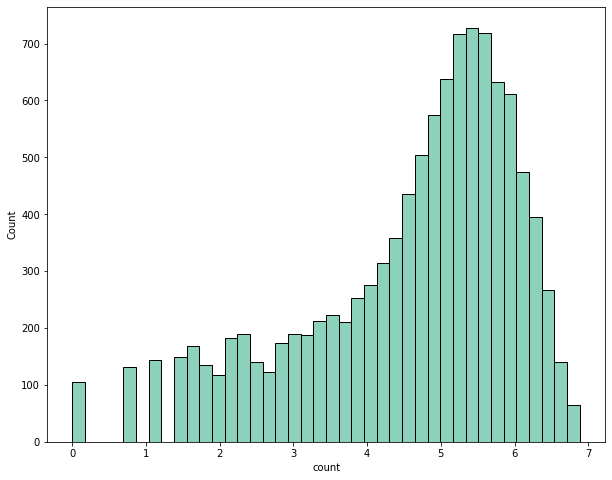

In [18]:
plt.figure(figsize=(10, 8))
sns.histplot(np.log(bike_sharing_train['count']))
plt.show()

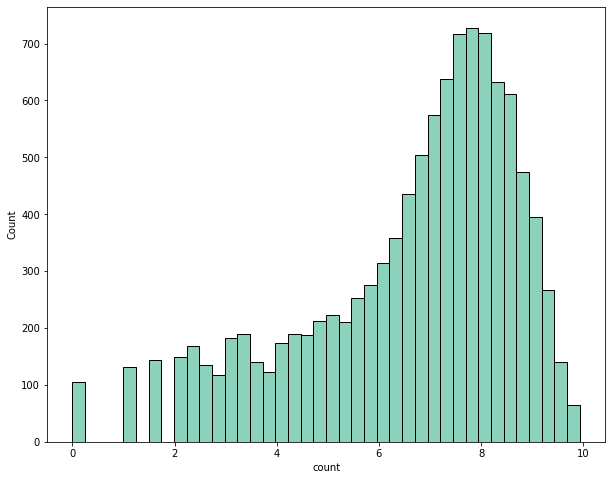

In [19]:
plt.figure(figsize=(10, 8))
sns.histplot(np.log2(bike_sharing_train['count']))
plt.show()

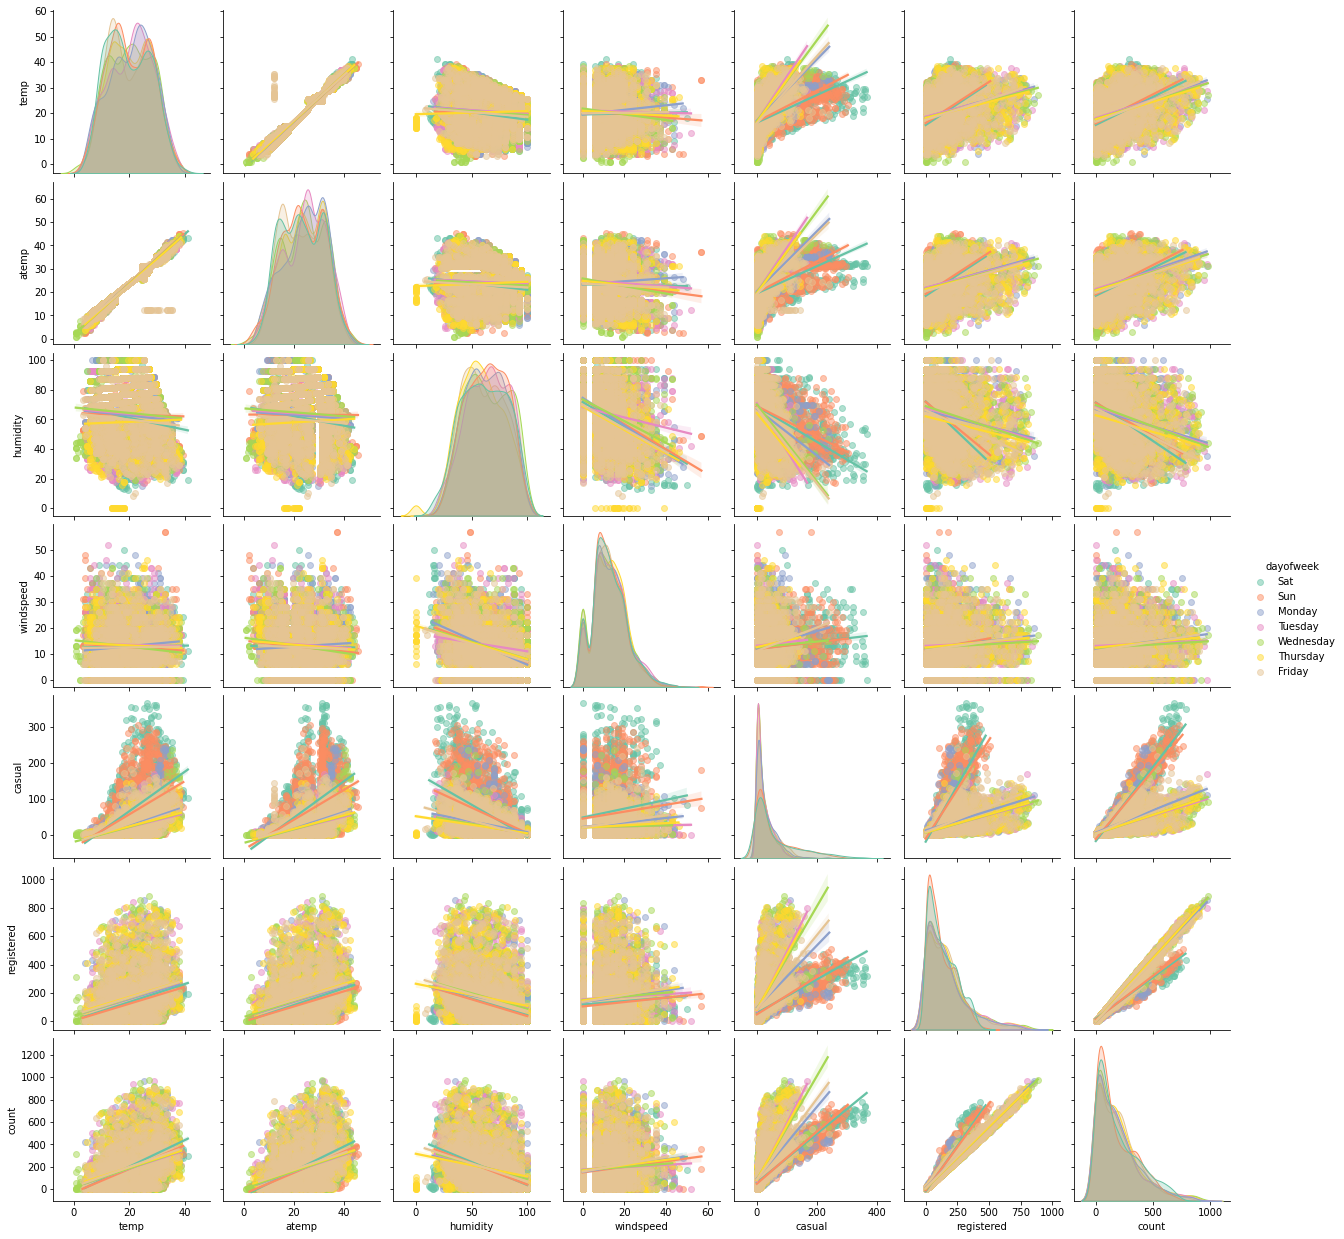

In [20]:
df = bike_sharing_train.copy()
df = df.drop(['year', 'month','day','hour'], axis = 1)
sns.pairplot(df, kind = 'reg',  hue = 'dayofweek', plot_kws={"scatter_kws": {"alpha":0.5}}) 

## Regression models

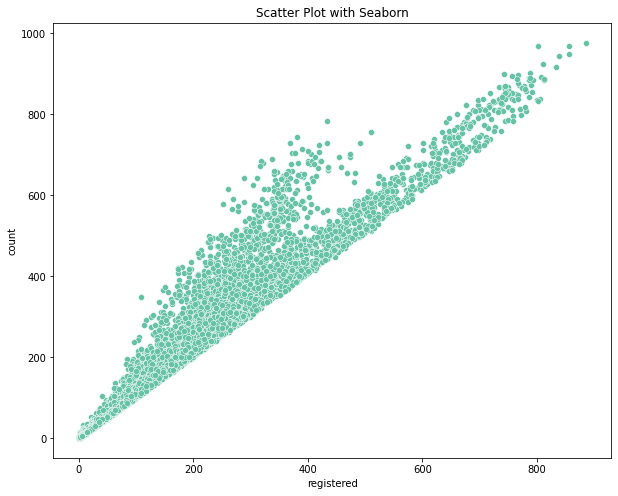

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='registered', y='count', data=bike_sharing_train)
plt.title("Scatter Plot with Seaborn")
plt.show()

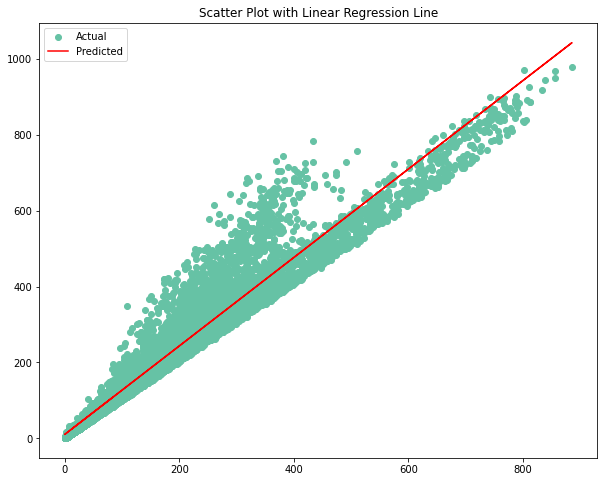

In [22]:
model = LinearRegression()
model.fit(bike_sharing_train[['registered']], bike_sharing_train['count'])

predicted = model.predict(bike_sharing_train[['registered']])
plt.figure(figsize=(10, 8))
plt.scatter(bike_sharing_train['registered'], bike_sharing_train['count'], label='Actual')
plt.plot(bike_sharing_train['registered'], predicted, color='red', label='Predicted')
plt.title("Scatter Plot with Linear Regression Line")
plt.legend()
plt.show()

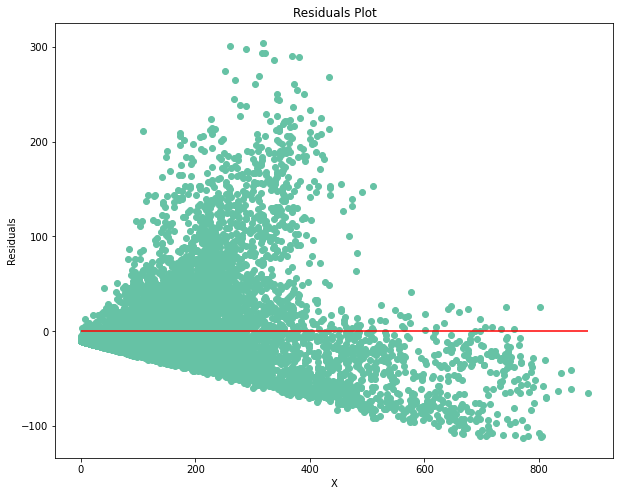

In [23]:
residuals = df['count'] - predicted

plt.figure(figsize=(10, 8))
plt.scatter(bike_sharing_train['registered'], residuals)
plt.hlines(y=0, xmin=bike_sharing_train['registered'].min(), xmax=bike_sharing_train['registered'].max(), color='red')
plt.title("Residuals Plot")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.show()

In [24]:
mse = mean_squared_error(bike_sharing_train['count'], predicted)
r2 = r2_score(bike_sharing_train['count'], predicted)

mse, r2

(1878.7103589542755, 0.9427402241756933)

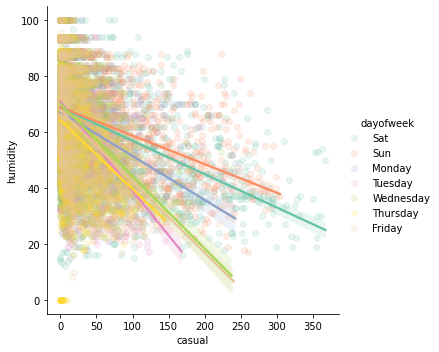

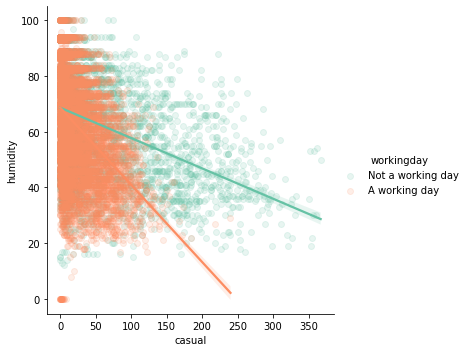

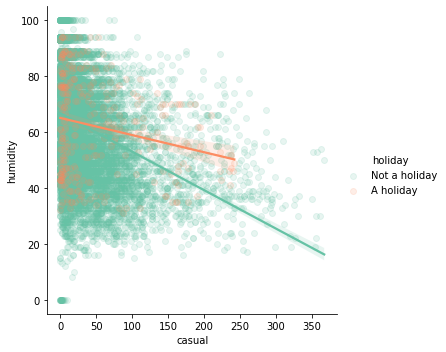

In [25]:
for x in ['dayofweek', 'workingday', 'holiday']:
    sns.lmplot(data = bike_sharing_train, x = 'casual', y = 'humidity', hue = x, scatter_kws = {'alpha':0.15})
    plt.show()

# Hous Price

In [26]:
hous_price = pd.read_csv('data/housprice.csv', skipinitialspace=True)
hous_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
hous_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
hous_price.shape

(1460, 81)

In [29]:
hous_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [30]:
hous_price.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## EDA

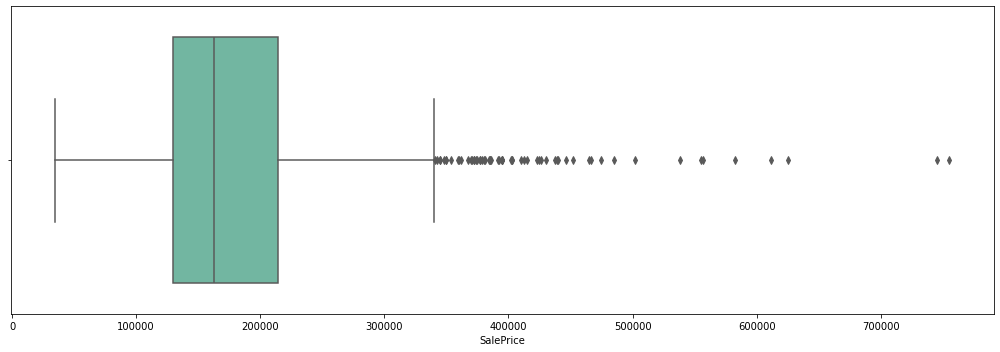

In [31]:
# Box_plot for SalePrice
plt.figure(figsize=(14, 5))
sns.boxplot(data = hous_price, x='SalePrice')
plt.tight_layout()

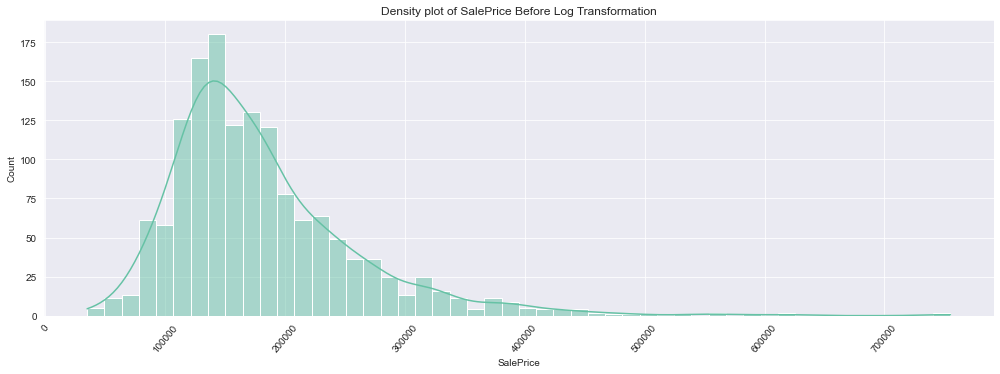

In [32]:
# The Density Plot of SalePrice
plt.figure(figsize=(14,5))
sns.set_style('darkgrid')
sns.histplot(data= hous_price, x='SalePrice', bins=50, kde=True)
plt.title("Density plot of SalePrice Before Log Transformation")
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

In [33]:
# Positive Skeweness or Right Skew
hous_price.SalePrice.skew()

1.8828757597682129

In [34]:
# In order to be SalePrice more normal I do Logarithm transformation.
hous_price['SalePrice'] = np.log1p(hous_price['SalePrice'])

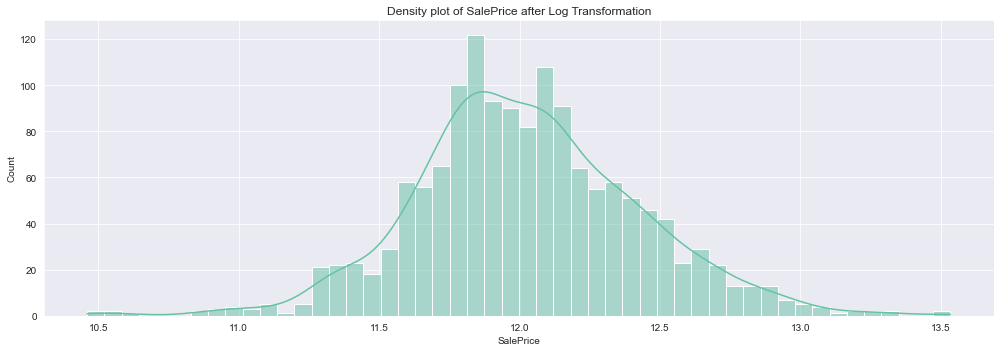

In [35]:
# Density plot for SalePrice after log transformation.
plt.figure(figsize=(14, 5))
sns.histplot(hous_price['SalePrice'], kde=True,bins=50)
plt.title("Density plot of SalePrice after Log Transformation")
plt.tight_layout()
plt.show()

### Missing Values

In [36]:
# Number of missing values in each column count 
col = hous_price.isna().sum()
col_na = pd.DataFrame({'Column': col.index,'Count':col.values}).sort_values(by='Count',ascending=False)
col_na.head(20)

,Column,Count
72,PoolQC,1453
74,MiscFeature,1406
6,Alley,1369
73,Fence,1179
57,FireplaceQu,690
3,LotFrontage,259
59,GarageYrBlt,81
64,GarageCond,81
58,GarageType,81
60,GarageFinish,81


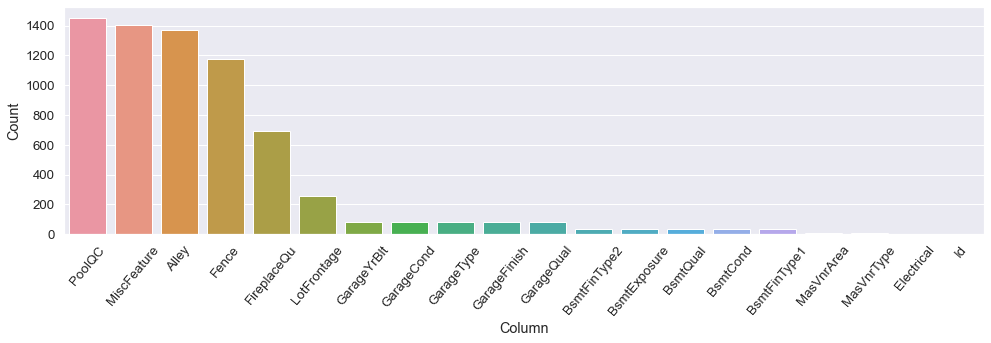

In [37]:
# Visual Representaion of top 20 columns with missing values
sns.set(font_scale=1.2)
plt.figure(figsize=(14, 5))
sns.barplot(data=col_na.head(20), x='Column', y='Count')
plt.xticks(rotation=50)
plt.tight_layout()

In [38]:
# Percentage of missing values 
col_na['Percent_nan'] = (col_na['Count']/hous_price.shape[0])*100
col_na

,Column,Count,Percent_nan
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
57,FireplaceQu,690,47.260274
...,...,...,...
27,ExterQual,0,0.000000
24,Exterior2nd,0,0.000000
23,Exterior1st,0,0.000000
22,RoofMatl,0,0.000000


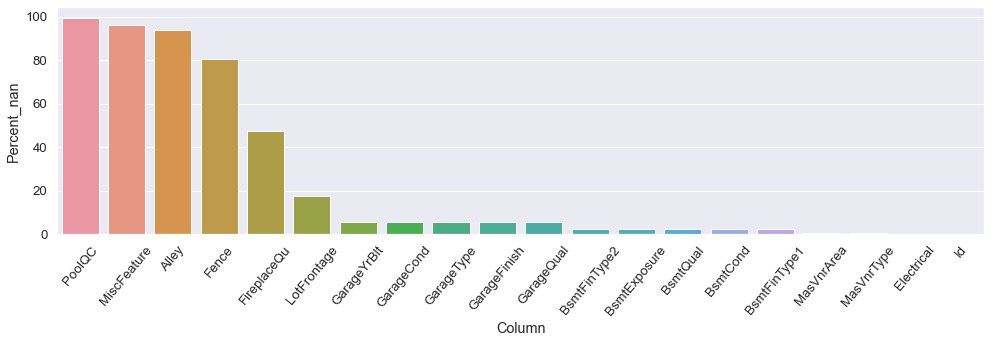

In [39]:
# visual for percentage of missing values
plt.figure(figsize=(14,5))
sns.set(font_scale=1.2)
sns.barplot(data=col_na.head(20),x='Column',y='Percent_nan')
plt.xticks(rotation=50)
plt.tight_layout()

Removing Id column

In [40]:
hous_price = hous_price.drop(columns='Id')

In [41]:
print(hous_price['Street'].value_counts())
print(hous_price['Utilities'].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [42]:
hous_price = hous_price.drop(columns=['Street','Utilities'])

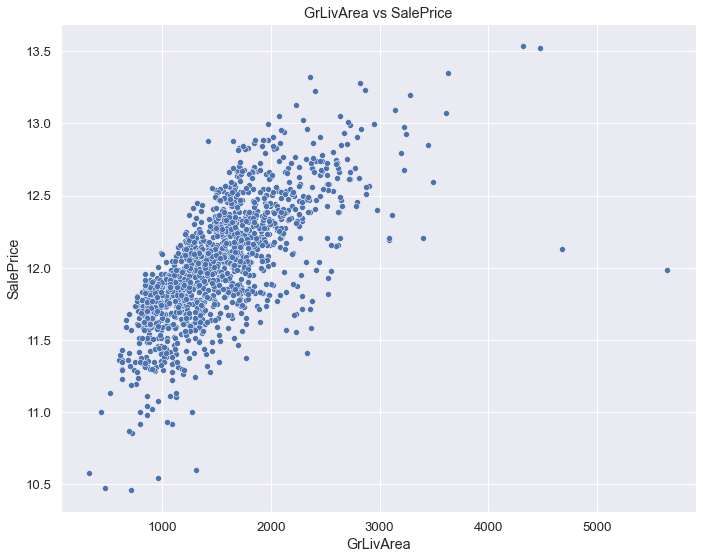

In [43]:
# plot for SalePrice vs GrLivArea
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.scatterplot(data=hous_price, y='SalePrice',x='GrLivArea')
plt.title("GrLivArea vs SalePrice")
plt.tight_layout()
plt.show()

## Linear Regression

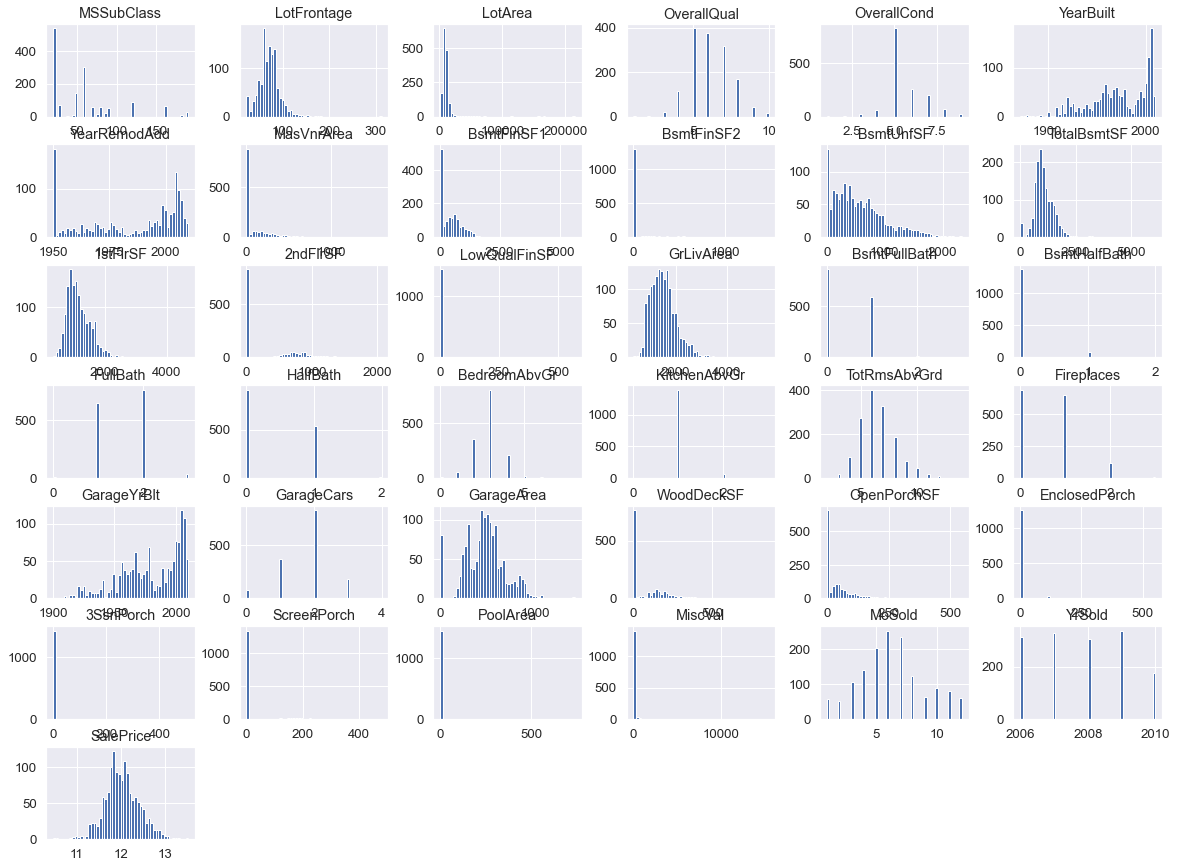

In [44]:
hous_price.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

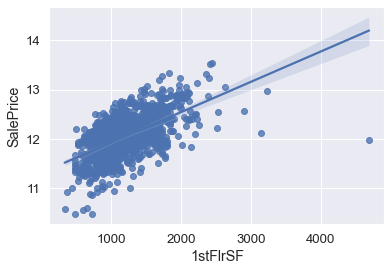

In [45]:
sns.regplot(x='1stFlrSF', y='SalePrice', data=hous_price)

### Model

Prepare data

In [46]:
# Total Squere Feet for house
hous_price["TotalSqrtFeet"] = hous_price["GrLivArea"] + hous_price["TotalBsmtSF"]
# Total number of bathrooms
hous_price["TotalBaths"] = hous_price["BsmtFullBath"] + (hous_price["BsmtHalfBath"]  * .5) + hous_price["FullBath"] + (hous_price["HalfBath"]* .5)
# If the house has a garage
hous_price['Isgarage'] = hous_price['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
# If the house has a fireplace
hous_price['Isfireplace'] = hous_price['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
# If the house has a pool
hous_price['Ispool'] = hous_price['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# If the house has second floor
hous_price['Issecondfloor'] = hous_price['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# If the house has Open Porch
hous_price['IsOpenPorch'] = hous_price['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
# If the house has Wood Deck
hous_price['IsWoodDeck'] = hous_price['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

In [47]:
feature_cols = ['TotalSqrtFeet', 'TotalBaths', 'Isgarage', 'Isfireplace', 'Ispool', 'Issecondfloor', 'IsOpenPorch', 'IsWoodDeck']

In [48]:
x = np.array(hous_price['TotalSqrtFeet']).reshape(-1,1)
y = np.array(hous_price['SalePrice']).reshape(-1,1)

In [49]:
# Create models Linear Regression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
print(lm.intercept_)
print(lm.coef_)

[11.14126805]
[[0.00034207]]


In [51]:
y_train_pred = lm.predict(X_train)
y_train_pred

array([[11.95163156],
       [12.04809527],
       [12.11411475],
       [12.076145  ],
       [12.04228008],
       [11.95949917],
       [11.52643872],
       [11.43031709],
       [12.08264432],
       [11.82711813],
       [11.84319542],
       [11.64411075],
       [11.94581638],
       [11.8445637 ],
       [12.16747765],
       [12.41855693],
       [12.56222628],
       [11.96052538],
       [12.11445682],
       [12.12642927],
       [11.97044541],
       [11.71697164],
       [12.46063153],
       [12.03201798],
       [12.04980562],
       [11.86098305],
       [12.40863691],
       [11.78983252],
       [12.08093397],
       [11.58903751],
       [12.2044212 ],
       [12.18937012],
       [11.90476799],
       [11.97318197],
       [12.01080965],
       [12.12369271],
       [11.78230698],
       [11.79872633],
       [11.81172499],
       [12.06690911],
       [12.2974642 ],
       [11.80625187],
       [12.03920145],
       [12.27625587],
       [11.91571423],
       [11

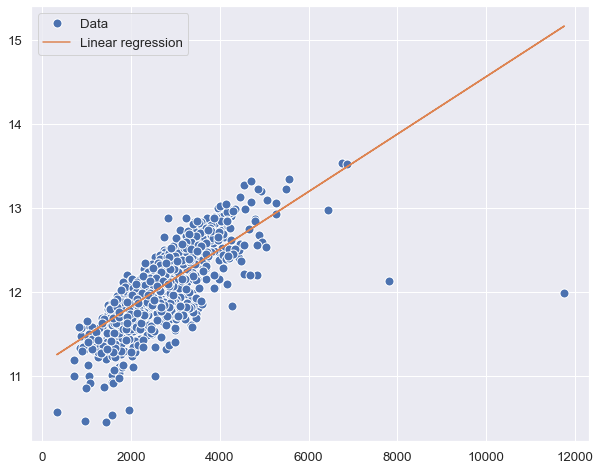

In [52]:
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'o', ms=9, mec='w')
plt.plot(X_train, y_train_pred, '-')
plt.legend(['Data', 'Linear regression'])
plt.show()

### Multiple Linear Regressio

In [53]:
x_mul = hous_price[feature_cols]
y = hous_price['SalePrice']

In [54]:
# Create models Linear Regression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

In [55]:
print(lm2.intercept_)
print(lm2.coef_)

11.141268050487003
[0.00034207]


In [56]:
y_train_pred_mul = lm2.predict(X_train)
y_train_pred_mul

array([11.95163156, 12.04809527, 12.11411475, 12.076145  , 12.04228008,
       11.95949917, 11.52643872, 11.43031709, 12.08264432, 11.82711813,
       11.84319542, 11.64411075, 11.94581638, 11.8445637 , 12.16747765,
       12.41855693, 12.56222628, 11.96052538, 12.11445682, 12.12642927,
       11.97044541, 11.71697164, 12.46063153, 12.03201798, 12.04980562,
       11.86098305, 12.40863691, 11.78983252, 12.08093397, 11.58903751,
       12.2044212 , 12.18937012, 11.90476799, 11.97318197, 12.01080965,
       12.12369271, 11.78230698, 11.79872633, 11.81172499, 12.06690911,
       12.2974642 , 11.80625187, 12.03920145, 12.27625587, 11.91571423,
       11.93008116, 11.85277337, 12.30704216, 12.07032981, 12.15995211,
       12.15208451, 11.97044541, 12.21741985, 12.00396825, 12.13327066,
       12.02791314, 12.22426125, 12.45618462, 12.00944137, 12.27420345,
       11.71868199, 12.70657976, 12.11616717, 11.79256908, 11.81856639,
       11.80009461, 11.86371961, 12.33577602, 12.01354621, 11.81

# CarPriceAssignment

In [57]:
CarPriceAssignment = pd.read_csv('data/CarPrice_Assignment.csv', skipinitialspace=True)
CarPriceAssignment.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [58]:
CarPriceAssignment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [59]:
CarPriceAssignment.shape

(205, 26)

In [60]:
CarPriceAssignment.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [61]:
# Checking for Null values
CarPriceAssignment.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [62]:
CarPriceAssignment['CarName']=CarPriceAssignment['CarName'].apply(lambda x:x.split(' ', 1)[0])
CarPriceAssignment.rename(columns = {'CarName':'companyname'}, inplace = True)
CarPriceAssignment.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [63]:
CarPriceAssignment.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [64]:
CarPriceAssignment.companyname.nunique()

28

In [65]:
# Fixing values in company name

CarPriceAssignment.companyname = CarPriceAssignment.companyname.str.lower()

def replace_name(a,b):
    CarPriceAssignment.companyname.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

CarPriceAssignment.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [66]:
# counting number of unique company names
CarPriceAssignment.companyname.nunique()

22

## EDA

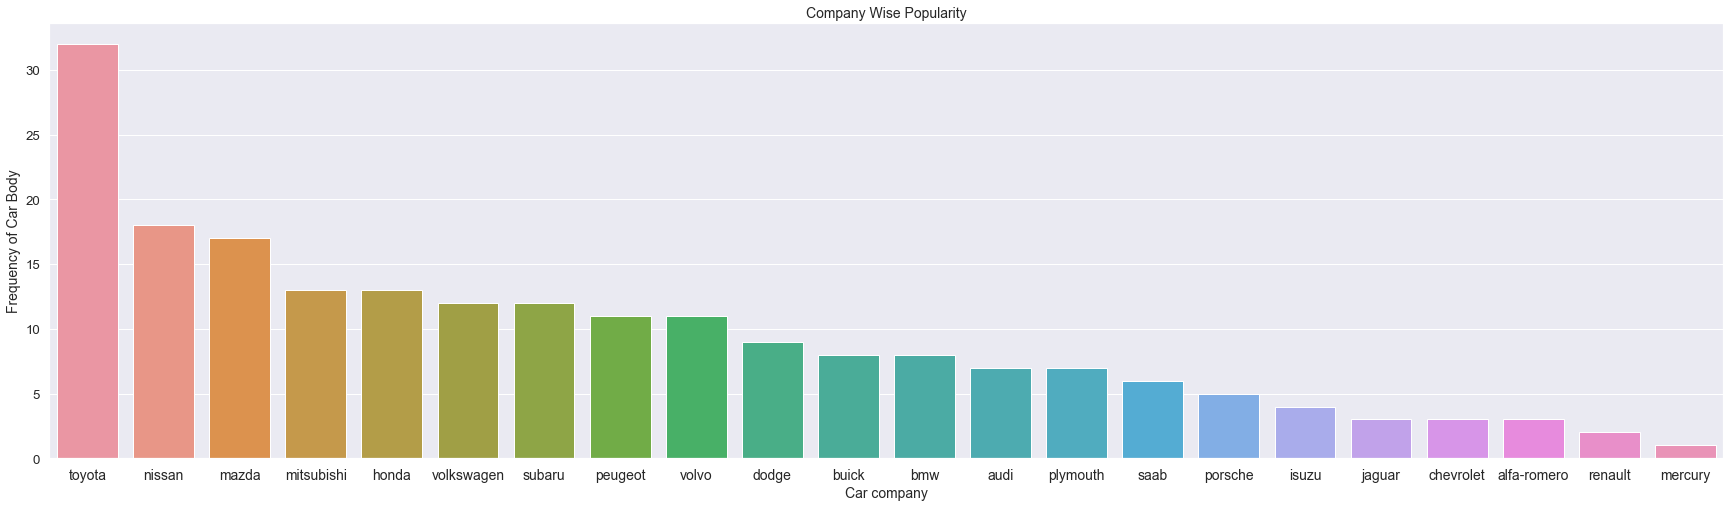

In [67]:
# plotting count of company names
plt.figure(figsize=(30, 8))
plt1=sns.countplot(x=CarPriceAssignment.companyname, data=CarPriceAssignment, order= CarPriceAssignment.companyname.value_counts().index)
plt.title('Company Wise Popularity', size=14)
plt1.set_xlabel('Car company', fontsize=14)
plt1.set_ylabel('Frequency of Car Body', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=360, size=14)
plt.show()

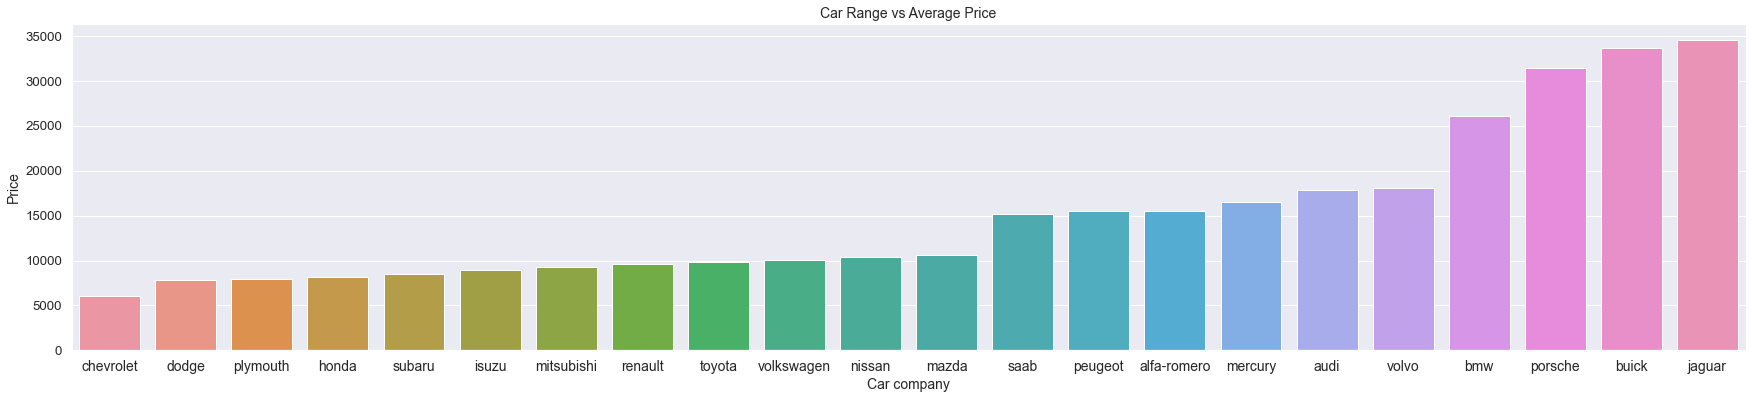

In [68]:
#plotting company wise average price of car

plt.figure(figsize=(30, 6))

df = pd.DataFrame(CarPriceAssignment.groupby(['companyname'])['price'].mean().sort_values())
df=df.reset_index(drop=False)
plt1=sns.barplot(x="companyname", y="price", data=df)
plt1.set_title('Car Range vs Average Price', size=14)
plt1.set_xlabel('Car company', fontsize=14)
plt1.set_ylabel('Price', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=360, size=14)
plt.show()

Let's visualize other categorical variables now, and see if the have any correlation with price

In [69]:
def plot_charts(var1, var2):
    plt.figure(figsize=(16, 12))   
    plt.subplot(2,2,1)
    plt.title('Histogram of '+ var1)
    sns.countplot(CarPriceAssignment[var1], palette=("husl"))
    plt1.set(xlabel = '%var1', ylabel='Frequency of'+ '%s'%var1)
    
    plt.subplot(2,2,2)
    plt.title(var1+' vs Price')
    sns.boxplot(x=CarPriceAssignment[var1], y=CarPriceAssignment.price, palette=("husl"))
    
    plt.subplot(2,2,3)
    plt.title('Histogram of '+ var2)
    sns.countplot(CarPriceAssignment[var2], palette=("husl"))
    plt1.set(xlabel = '%var2', ylabel='Frequency of'+ '%s'%var2)
    
    plt.subplot(2,2,4)
    plt.title(var1+' vs Price')
    sns.boxplot(x=CarPriceAssignment[var2], y=CarPriceAssignment.price, palette=("husl"))
    
    plt.show()   

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


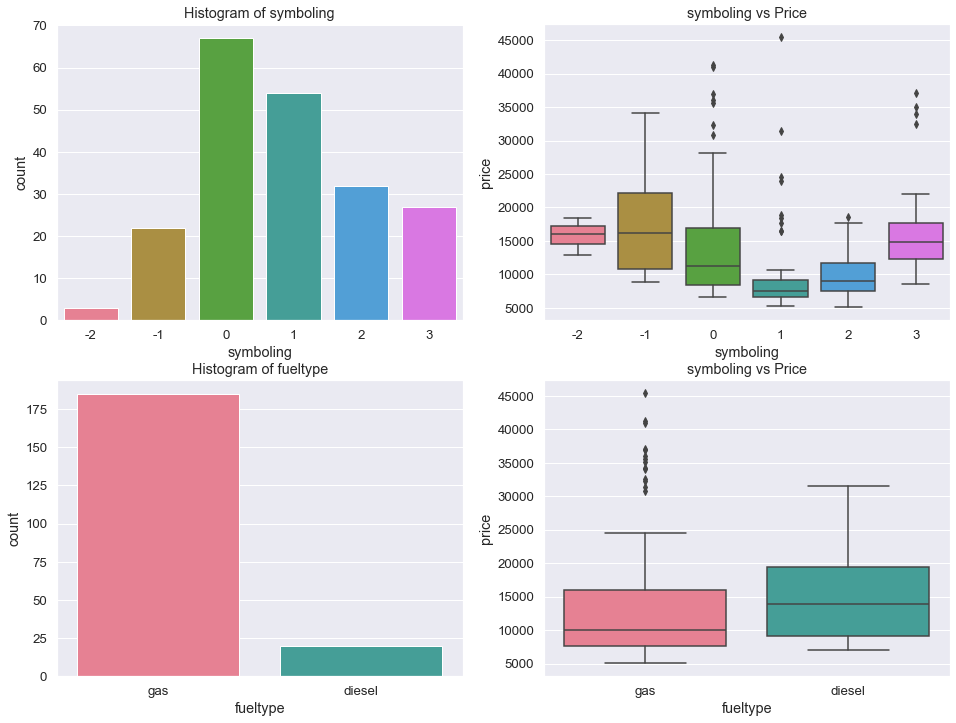

In [70]:
plot_charts('symboling', 'fueltype')

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


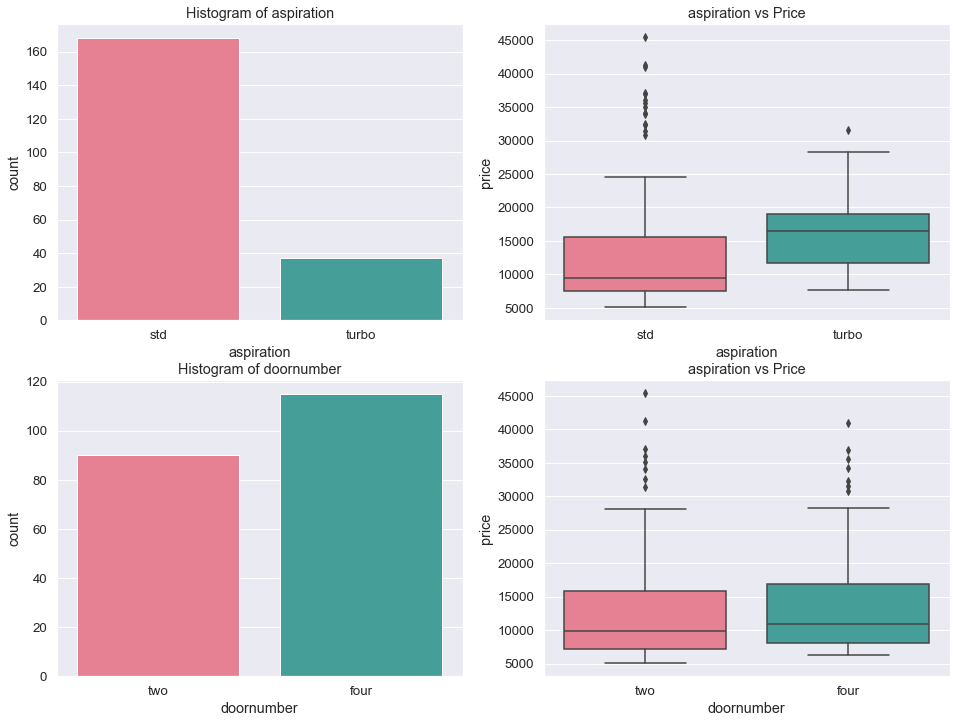

In [71]:
plot_charts('aspiration', 'doornumber')

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


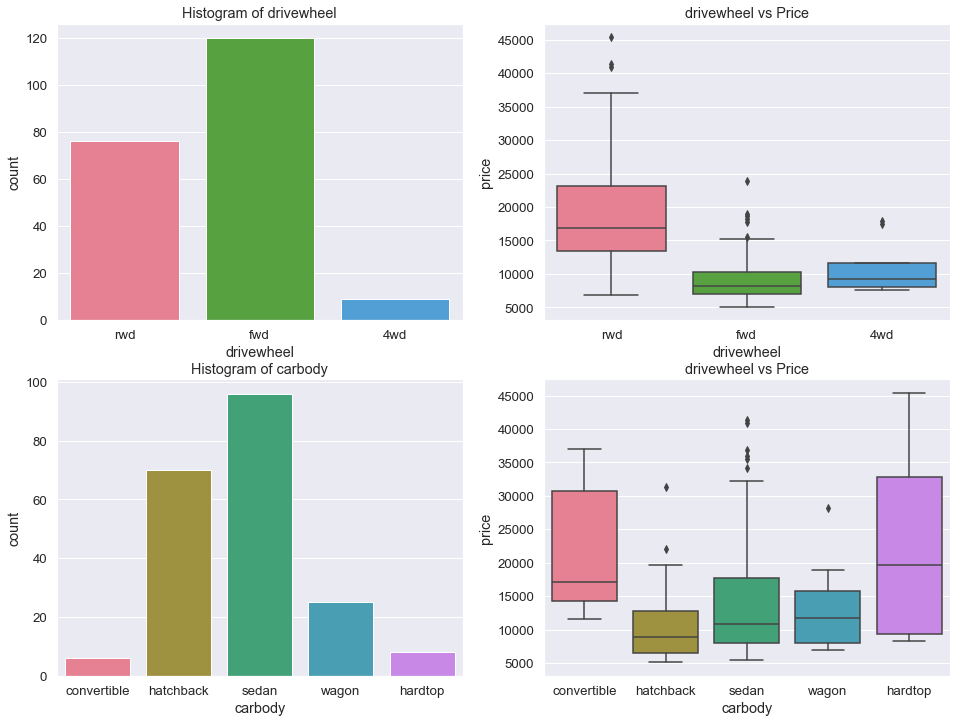

In [72]:
plot_charts('drivewheel', 'carbody')

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


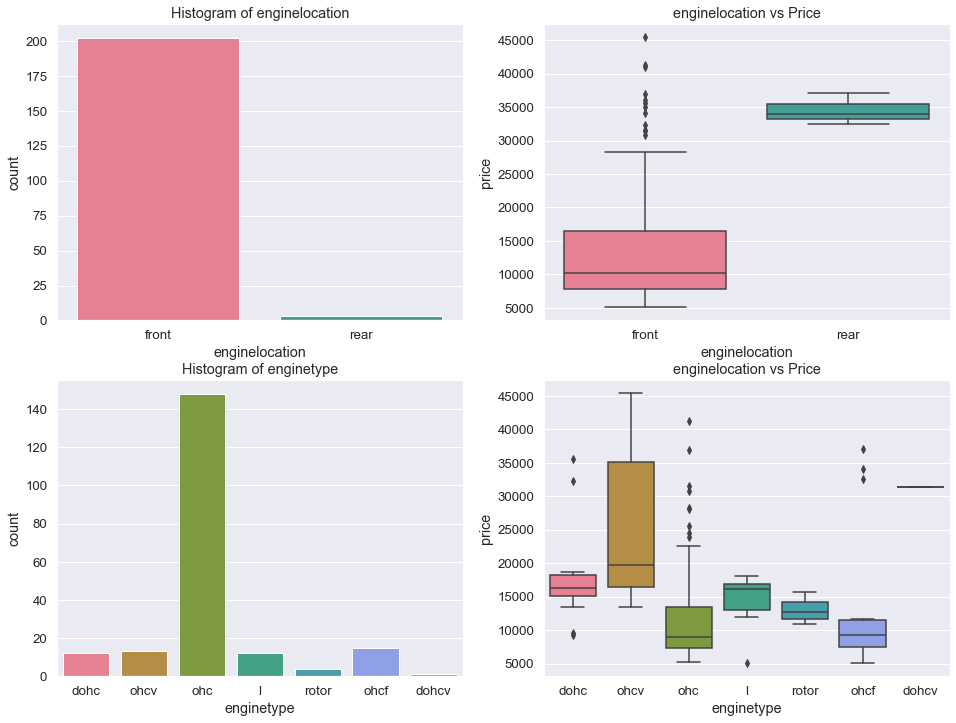

In [73]:
plot_charts('enginelocation', 'enginetype')

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


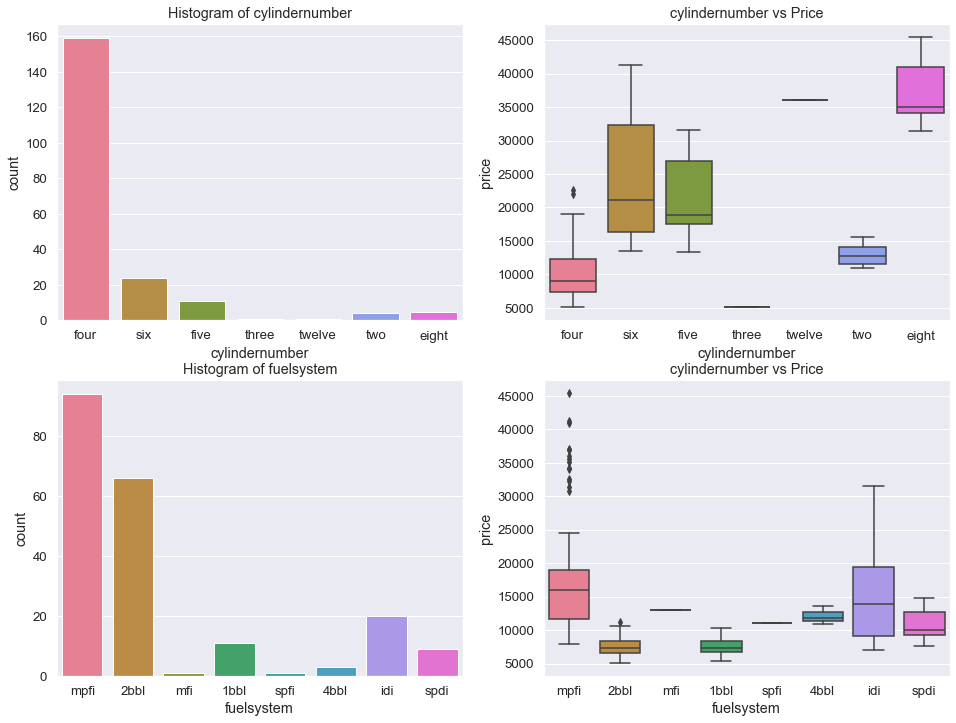

In [74]:
plot_charts('cylindernumber', 'fuelsystem')

Visualizing Numeric Variable

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


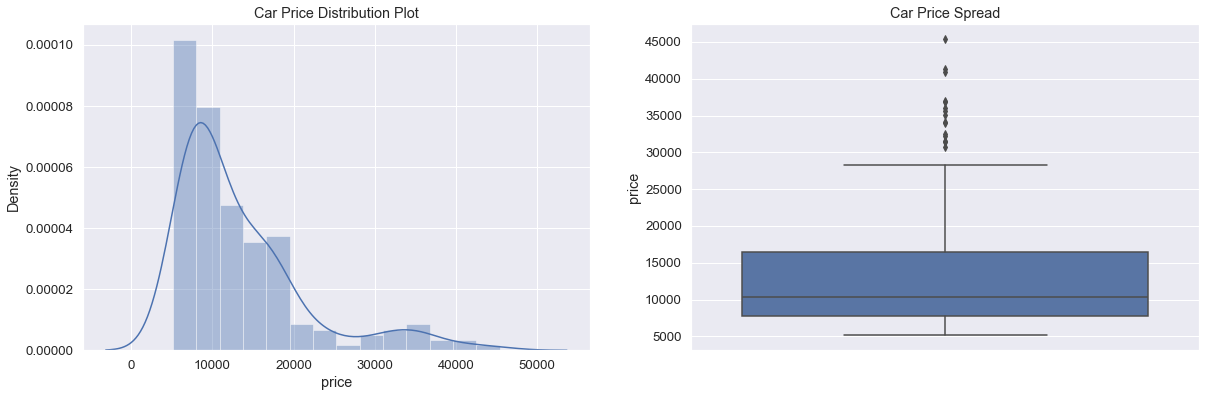

In [75]:
# Checking distribution and spread of car price
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(CarPriceAssignment.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=CarPriceAssignment.price)
plt.show()

In [76]:
# Checking numeric columns
CarPriceAssignment.select_dtypes(include=['float64','int64']).columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

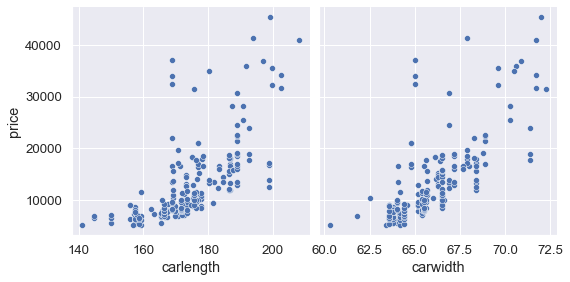

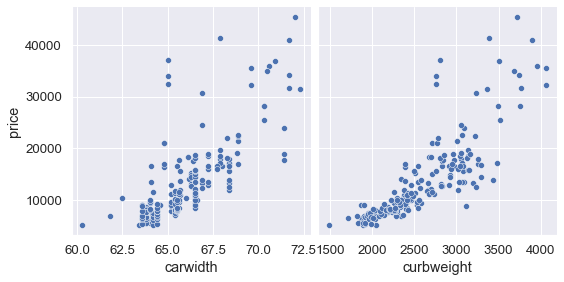

In [77]:
# Function to plot scatter plot numeric variables with price
def pp(x,y):
    sns.pairplot(CarPriceAssignment, x_vars=[x,y], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('carlength', 'carwidth')
pp('carwidth', 'curbweight')

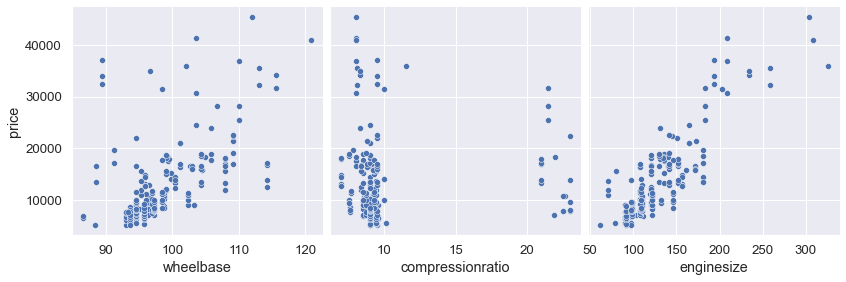

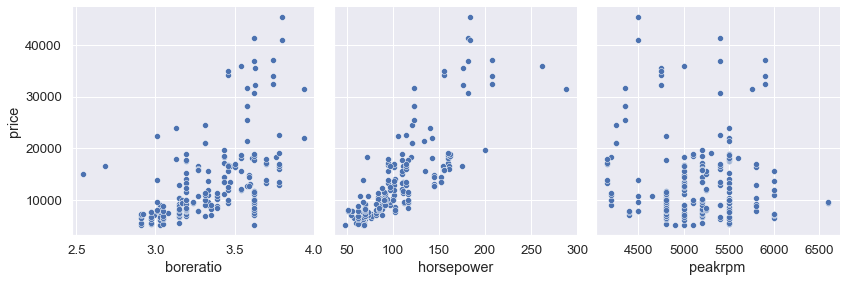

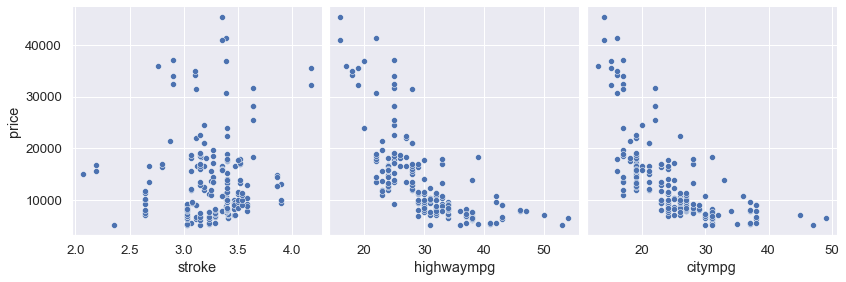

In [78]:
# Function to plot scatter plot numeric variables with price

def pp(x,y,z):
    sns.pairplot(CarPriceAssignment, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('wheelbase', 'compressionratio', 'enginesize')
pp('boreratio', 'horsepower', 'peakrpm')
pp('stroke', 'highwaympg', 'citympg')

In [79]:
# Converting cylinder number to numeric and replacing values
def replace_values(a,b):
    CarPriceAssignment.cylindernumber.replace(a,b,inplace=True)

replace_values('four','4')
replace_values('six','6')
replace_values('five','5')
replace_values('three','3')
replace_values('twelve','12')
replace_values('two','2')
replace_values('eight','8')

CarPriceAssignment.cylindernumber=CarPriceAssignment.cylindernumber.astype('int')

In [80]:
CarPriceAssignment.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [81]:
# Converting symboling to categorical because the numeric values imply weight

def replace_values(a,b):
    CarPriceAssignment.symboling.replace(a,b,inplace=True)

replace_values(3,'Very_Risky')
replace_values(2,'Moderately_Risky')
replace_values(1,'Neutral')
replace_values(0,'Safe')
replace_values(-1,'Moderately_Safe')
replace_values(-2,'Very_Safe')

In [82]:
# Converting variables with 2 values to 1 and 0
CarPriceAssignment['fueltype'] = CarPriceAssignment['fueltype'].map({'gas': 1, 'diesel': 0})
CarPriceAssignment['aspiration'] = CarPriceAssignment['aspiration'].map({'std': 1, 'turbo': 0})
CarPriceAssignment['doornumber'] = CarPriceAssignment['doornumber'].map({'two': 1, 'four': 0})
CarPriceAssignment['enginelocation'] = CarPriceAssignment['enginelocation'].map({'front': 1, 'rear': 0})

In [83]:
# Dropping card_Id because it has all unique values
CarPriceAssignment.drop(['car_ID'], axis =1, inplace = True)

In [84]:
# Numeric variables
num_vars=CarPriceAssignment.select_dtypes(include=['float64','int64']).columns

<Axes: >

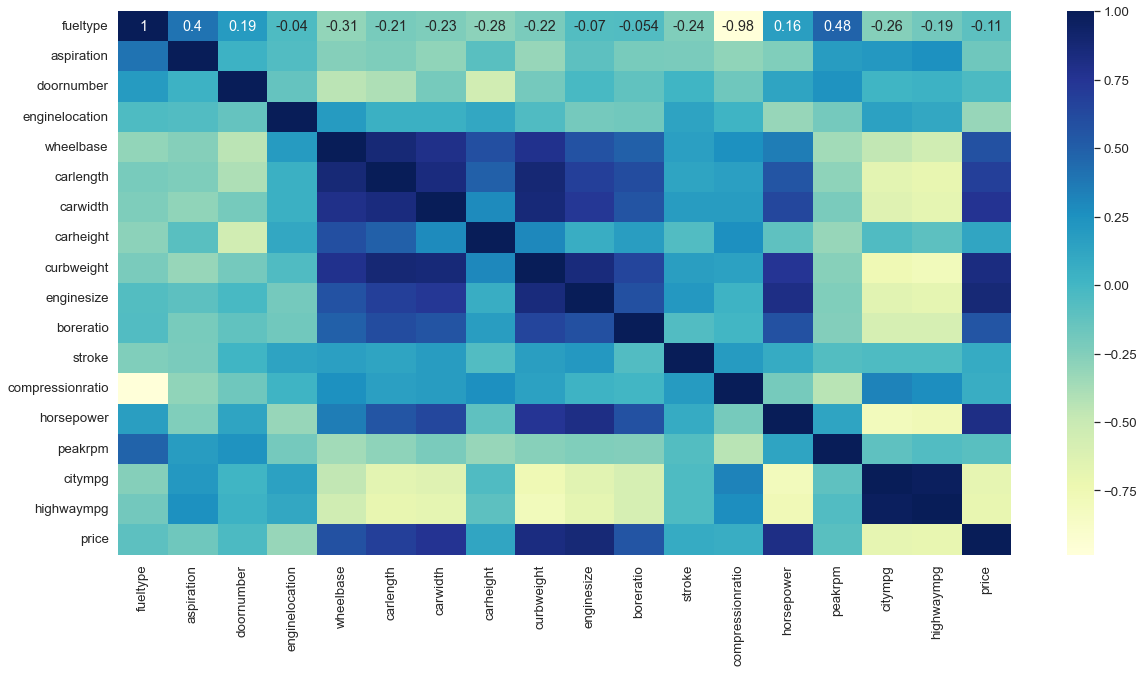

In [85]:
# Plotting heatmap to check correlation amongst variables
plt.figure(figsize = (20,10))  
sns.heatmap(CarPriceAssignment[num_vars].corr(),cmap="YlGnBu",annot = True)

In [86]:
# Dropping variables which are highly correlated to other variables
CarPriceAssignment.drop(['compressionratio','carwidth','curbweight','wheelbase','citympg'], axis =1, inplace = True)

In [87]:
CarPriceAssignment.head()

,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,highwaympg,price
0,Very_Risky,alfa-romero,1,1,1,convertible,rwd,1,168.8,48.8,dohc,4,130,mpfi,3.47,2.68,111,5000,27,13495.0
1,Very_Risky,alfa-romero,1,1,1,convertible,rwd,1,168.8,48.8,dohc,4,130,mpfi,3.47,2.68,111,5000,27,16500.0
2,Neutral,alfa-romero,1,1,1,hatchback,rwd,1,171.2,52.4,ohcv,6,152,mpfi,2.68,3.47,154,5000,26,16500.0
3,Moderately_Risky,audi,1,1,0,sedan,fwd,1,176.6,54.3,ohc,4,109,mpfi,3.19,3.40,102,5500,30,13950.0
4,Moderately_Risky,audi,1,1,0,sedan,4wd,1,176.6,54.3,ohc,5,136,mpfi,3.19,3.40,115,5500,22,17450.0


In [88]:
# Getting dummies for categorical variables
df = pd.get_dummies(CarPriceAssignment)
df.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,1,1,1,168.8,48.8,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,168.8,48.8,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,171.2,52.4,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,1,1,0,1,176.6,54.3,4,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,176.6,54.3,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [89]:
# Checking column names for dummy variables
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carlength',
       'carheight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'highwaympg', 'price',
       'symboling_Moderately_Risky', 'symboling_Moderately_Safe',
       'symboling_Neutral', 'symboling_Safe', 'symboling_Very_Risky',
       'symboling_Very_Safe', 'companyname_alfa-romero', 'companyname_audi',
       'companyname_bmw', 'companyname_buick', 'companyname_chevrolet',
       'companyname_dodge', 'companyname_honda', 'companyname_isuzu',
       'companyname_jaguar', 'companyname_mazda', 'companyname_mercury',
       'companyname_mitsubishi', 'companyname_nissan', 'companyname_peugeot',
       'companyname_plymouth', 'companyname_porsche', 'companyname_renault',
       'companyname_saab', 'companyname_subaru', 'companyname_toyota',
       'companyname_volkswagen', 'companyname_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan

In [90]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [91]:
# For scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [92]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'enginesize','horsepower', 
            'peakrpm', 'highwaympg', 'carlength', 'carheight', 'boreratio', 'stroke', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,1.0,1.0,0.0,1.0,0.426016,0.265487,4,0.139623,0.230159,0.525253,...,0,0,0,1,0,0,0,0,0,0
125,1.0,1.0,1.0,1.0,0.452033,0.212389,4,0.339623,1.000000,0.464646,...,0,0,0,0,0,0,0,1,0,0
166,1.0,1.0,1.0,1.0,0.448780,0.424779,4,0.139623,0.444444,0.449495,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1.0,1.0,1.0,0.450407,0.088496,4,0.260377,0.626984,0.247475,...,0,0,0,0,0,0,0,1,0,0
199,1.0,0.0,0.0,1.0,0.775610,0.858407,4,0.260377,0.746032,0.484848,...,0,0,0,0,0,0,0,1,0,0


Dividing into X and Y sets for the Model Building

In [93]:
# Dividing into x and y sets where y has the variable we have to predict
y_train = df_train.pop('price')
X_train = df_train

In [94]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [95]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 52),
 ('aspiration', False, 49),
 ('doornumber', False, 51),
 ('enginelocation', False, 15),
 ('carlength', False, 27),
 ('carheight', False, 29),
 ('cylindernumber', False, 26),
 ('enginesize', True, 1),
 ('boreratio', False, 18),
 ('stroke', False, 14),
 ('horsepower', False, 50),
 ('peakrpm', True, 1),
 ('highwaympg', False, 39),
 ('symboling_Moderately_Risky', False, 47),
 ('symboling_Moderately_Safe', False, 36),
 ('symboling_Neutral', False, 38),
 ('symboling_Safe', False, 37),
 ('symboling_Very_Risky', False, 33),
 ('symboling_Very_Safe', False, 5),
 ('companyname_alfa-romero', False, 22),
 ('companyname_audi', False, 21),
 ('companyname_bmw', True, 1),
 ('companyname_buick', True, 1),
 ('companyname_chevrolet', False, 4),
 ('companyname_dodge', False, 6),
 ('companyname_honda', False, 3),
 ('companyname_isuzu', False, 10),
 ('companyname_jaguar', False, 23),
 ('companyname_mazda', False, 11),
 ('companyname_mercury', False, 53),
 ('companyname_mitsubishi', 

In [96]:
#checking RFE columns
col = X_train.columns[rfe.support_]
col

Index(['enginesize', 'peakrpm', 'companyname_bmw', 'companyname_buick',
       'companyname_peugeot', 'companyname_renault', 'companyname_subaru',
       'enginetype_dohc', 'enginetype_ohc', 'enginetype_ohcv'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [97]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [98]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [99]:
#function for checking VIF
def checkVIF(X):
    vif = pd.DataFrame()
    vif['variable'] = X.columns    
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [100]:
# building MODEL
lm = sm.OLS(y_train,X_train_rfe).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     99.80
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           1.60e-56
Time:                        13:44:33   Log-Likelihood:                 170.47
No. Observations:                 143   AIC:                            -318.9
Df Residuals:                     132   BIC:                            -286.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0424    